# Collect Tweets into MongoDB

## Install Python libraries

You may need to restart your Jupyter Notebook instance after installed those libraries.

In [1]:
!pip install pymongo

You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [2]:
!pip install pymongo[srv]

You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [3]:
!pip install dnspython

You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [4]:
!pip install tweepy

You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [5]:
!pip install twitter

You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


## Import Python libraries

In [6]:
import pymongo
from pymongo import MongoClient
import json
import tweepy
import twitter
from pprint import pprint
import configparser
import pandas as pd

##  Load the Authorization Info

Save database connection info and API Keys in a config.ini file and use the configparse to load the authorization info. 

In [7]:
config = configparser.ConfigParser()
config.read('config.ini')

CONSUMER_KEY      = config['mytwitter']['api_key']
CONSUMER_SECRET   = config['mytwitter']['api_secrete']
OAUTH_TOKEN       = config['mytwitter']['access_token']
OATH_TOKEN_SECRET = config['mytwitter']['access_secrete']

mongod_connect = config['mymongo']['connection']

## Connect to the MongoDB Cluster

In [8]:
client = MongoClient(mongod_connect)
db = client.gp18 # use or create a database named demo
tweet_collection = db.final_project #use or create a collection named tweet_collection
tweet_collection.create_index([("id", pymongo.ASCENDING)],unique = True) # make sure the collected tweets are unique

'id_1'

## Use the REST API to Collect Tweets

Authorize the REST API 

In [9]:
rest_auth = twitter.oauth.OAuth(OAUTH_TOKEN,OATH_TOKEN_SECRET,CONSUMER_KEY,CONSUMER_SECRET)
rest_api = twitter.Twitter(auth=rest_auth)

Define the query for the REST API

In [13]:
count = 100 
geocode = "33.7679192,-84.5606886,100mi" 
q = "covid19"                               

The collected tweets will contain 'covid19' <span style="color:red;font-weight:bold"> AND </span> are located in Atlanta, GA

In [24]:
search_results = rest_api.search.tweets( count=count,q=q, geocode=geocode) #you can use both q and geocode
statuses = search_results["statuses"]
since_id_new = statuses[-1]['id']
for statuse in statuses:
    try:
        tweet_collection.insert_one(statuse)
        pprint(statuse['created_at'])# print the date of the collected tweets
    except:
        pass

'Sun Dec 13 22:31:28 +0000 2020'
'Sun Dec 13 22:29:20 +0000 2020'


Continue fetching early tweets with the same query. 
<p><span style="color:red;font-weight:bold">YOU WILL REACH YOUR RATE LIMIT VERY FAST</span></p>

In [16]:
since_id_old = 0
while(since_id_new != since_id_old):
    since_id_old = since_id_new
    search_results = rest_api.search.tweets( count=count,q=q,
                        geocode=geocode, max_id= since_id_new)
    statuses = search_results["statuses"]
    since_id_new = statuses[-1]['id']
    for statuse in statuses:
        try:
            tweet_collection.insert_one(statuse)
            pprint(statuse['created_at']) # print the date of the collected tweets
        except:
            pass

'Thu Dec 10 14:07:18 +0000 2020'
'Thu Dec 10 14:06:44 +0000 2020'
'Thu Dec 10 14:06:21 +0000 2020'
'Thu Dec 10 14:06:06 +0000 2020'
'Thu Dec 10 14:05:18 +0000 2020'
'Thu Dec 10 14:05:03 +0000 2020'
'Thu Dec 10 14:04:27 +0000 2020'
'Thu Dec 10 14:04:05 +0000 2020'
'Thu Dec 10 14:03:59 +0000 2020'
'Thu Dec 10 14:03:42 +0000 2020'
'Thu Dec 10 14:03:35 +0000 2020'
'Thu Dec 10 14:01:48 +0000 2020'
'Thu Dec 10 14:01:41 +0000 2020'
'Thu Dec 10 14:01:10 +0000 2020'
'Thu Dec 10 14:00:36 +0000 2020'
'Thu Dec 10 13:59:04 +0000 2020'
'Thu Dec 10 13:59:00 +0000 2020'
'Thu Dec 10 13:58:49 +0000 2020'
'Thu Dec 10 13:58:07 +0000 2020'
'Thu Dec 10 13:57:56 +0000 2020'
'Thu Dec 10 13:56:53 +0000 2020'
'Thu Dec 10 13:56:47 +0000 2020'
'Thu Dec 10 13:55:48 +0000 2020'
'Thu Dec 10 13:55:21 +0000 2020'
'Thu Dec 10 13:54:54 +0000 2020'
'Thu Dec 10 13:54:32 +0000 2020'
'Thu Dec 10 13:54:06 +0000 2020'
'Thu Dec 10 13:54:00 +0000 2020'
'Thu Dec 10 13:52:06 +0000 2020'
'Thu Dec 10 13:50:56 +0000 2020'
'Thu Dec 1

KeyboardInterrupt: 

## View the Collected Tweets

Print the number of tweets and unique twitter users

In [17]:
print(tweet_collection.estimated_document_count())# number of tweets collected

user_cursor = tweet_collection.distinct("user.id")
print (len(user_cursor)) # number of unique Twitter users 

7807
5882


Create a text index and print the Tweets containing specific keywords. 

In [18]:
tweet_collection.create_index([("text", pymongo.TEXT)], name='text_index', default_language='english') # create a text index


'text_index'

Create a cursor to query tweets with the created index

In [19]:
tweet_cursor = tweet_collection.find({"$text": {"$search": "covid19"}}) # return tweets contain vote

Use pprint to display tweets

In [20]:

for document in tweet_cursor[0:10]: # display the first 10 tweets from the query
    try:
        print ('----')
#         pprint (document) # use pprint to print the entire tweet document
   
        print ('name:', document["user"]["name"]) # user name
        print ('text:', document["text"])         # tweets
    except:
        print ("***error in encoding")
        pass

----
name: #ADOS #Reparations
text: Covid19 is Real
Covid19 is Real
Covid19 is Real 
Covid19 is Real 
Covid19 is Real 
Covid19 is Real 
Covid19 is Real
----
name: Ella America
text: @schwaid @BeschlossDC @FoxNews @GOP But did they really die from COVID19, or with COVID19? Big difference.
----
name: #one@goingup
text: RT @jamalhbryant: Dear Lord today, heal those who have contracted #covid19, restore those who have suffered lost from #covid19 &amp; release fi…
----
name: Judge Robertson
text: RT @CDCgov: #SocialDistancing is one of the best tools to avoid being exposed to #COVID19. To help #SlowTheSpread of #COVID19, keep key tim…
----
name: Complex Networks
text: RT @CDCFound: #COVID19 is hitting the Black community hard. Black men and women are 3x as likely to be infected with #COVID19 than their wh…
----
name: Ņ̨͈̯̻̪̥̥ͅickS̘͓͙usi
text: RT @CDCFound: #COVID19 is hitting the Black community hard. Black men and women are 3x as likely to be infected with #COVID19 than their wh…
----
name

In [21]:
tweet_cursor = tweet_collection.find({"$text": {"$search": "covid19"}}) # return tweets contain vote

Use pandas to display tweets

In [22]:
tweet_df = pd.DataFrame(list(tweet_cursor ))
tweet_df[:10] #display the first 10 tweets

,_id,created_at,id,id_str,text,truncated,entities,metadata,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,lang,retweeted_status,possibly_sensitive,quoted_status_id,quoted_status_id_str,extended_entities,quoted_status
0,5fd6942b164f97d0620b9808,Sun Dec 13 22:01:17 +0000 2020,1338242613665796097,1338242613665796097,Covid19 is Real\nCovid19 is Real\nCovid19 is R...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",NaN,...,0,False,False,en,NaN,NaN,NaN,NaN,NaN,NaN
1,5fd69466164f97d0620baade,Fri Dec 11 03:30:32 +0000 2020,1337238311560212483,1337238311560212483,@schwaid @BeschlossDC @FoxNews @GOP But did th...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",1.337085e+18,...,13,False,False,en,NaN,NaN,NaN,NaN,NaN,NaN
2,5fd695fb5ecd153718218b56,Wed Dec 09 23:43:56 +0000 2020,1336818894930141184,1336818894930141184,"RT @jamalhbryant: Dear Lord today, heal those ...",False,"{'hashtags': [{'text': 'covid19', 'indices': [...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,0,False,False,en,{'created_at': 'Mon Dec 07 13:31:33 +0000 2020...,NaN,NaN,NaN,NaN,NaN
3,5fd695f65ecd15371821894c,Thu Dec 10 09:00:44 +0000 2020,1336959021350207495,1336959021350207495,RT @CDCgov: #SocialDistancing is one of the be...,False,"{'hashtags': [{'text': 'SocialDistancing', 'in...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,0,False,False,en,{'created_at': 'Sun Oct 25 18:21:00 +0000 2020...,NaN,NaN,NaN,NaN,NaN
4,5fd69472164f97d0620baf50,Thu Dec 10 19:49:59 +0000 2020,1337122409711689728,1337122409711689728,RT @CDCFound: #COVID19 is hitting the Black co...,False,"{'hashtags': [{'text': 'COVID19', 'indices': [...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,...,0,False,False,en,{'created_at': 'Wed Dec 09 21:30:04 +0000 2020...,NaN,NaN,NaN,NaN,NaN
5,5fd69462164f97d0620ba952,Fri Dec 11 12:06:25 +0000 2020,1337368137608605706,1337368137608605706,RT @CDCFound: #COVID19 is hitting the Black co...,False,"{'hashtags': [{'text': 'COVID19', 'indices': [...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,...,0,False,False,en,{'created_at': 'Wed Dec 09 21:30:04 +0000 2020...,NaN,NaN,NaN,NaN,NaN
6,5fd6945d164f97d0620ba7a3,Fri Dec 11 16:53:13 +0000 2020,1337440310926905346,1337440310926905346,"RT @jamalhbryant: Dear Lord today, heal those ...",False,"{'hashtags': [{'text': 'covid19', 'indices': [...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",NaN,...,0,False,False,en,{'created_at': 'Mon Dec 07 13:31:33 +0000 2020...,NaN,NaN,NaN,NaN,NaN
7,5fd6945b164f97d0620ba6d9,Fri Dec 11 18:13:34 +0000 2020,1337460534086668290,1337460534086668290,@ddheruiz This is the face of a worn out dad w...,True,"{'hashtags': [{'text': 'covid19', 'indices': [...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",1.337455e+18,...,33,False,False,en,NaN,False,NaN,NaN,NaN,NaN
8,5fd6943c164f97d0620b9a7a,Sun Dec 13 14:39:53 +0000 2020,1338131533954240512,1338131533954240512,"Dear Lord today, heal those who have contracte...",True,"{'hashtags': [{'text': 'covid19', 'indices': [...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,0,False,False,en,NaN,NaN,NaN,NaN,NaN,NaN
9,5fd695f75ecd153718218994,Thu Dec 10 06:17:39 +0000 2020,1336917979125051392,1336917979125051392,"Prayers for Our country more than 3,000 covid1...",False,"{'hashtags': [{'text': 'COVID19', 'indices': [...","{'iso_language_code': 'en', 'result_type': 're

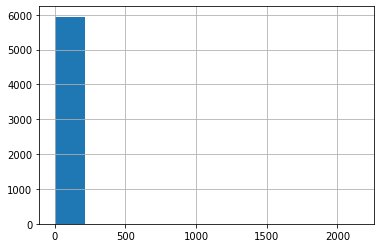

In [23]:
tweet_df["favorite_count"].hist() # create a histogram show the favorite count